In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")
%matplotlib inline

# Problem 1

In [33]:
# Reading the Election data
df = pd.read_excel(r'D:\Ashish\Studies\DSBA\PGP-DSBA\Main Course\MODULE 6- Machine Learning\Project\Datasets\Election_Data.xlsx', sheet_name='Election_Dataset_Two Classes')

In [34]:
df.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [35]:
df['gender'].value_counts()

female    812
male      713
Name: gender, dtype: int64

In [36]:
df['vote'].value_counts()

Labour          1063
Conservative     462
Name: vote, dtype: int64

In [37]:
df.dtypes

Unnamed: 0                  int64
vote                       object
age                         int64
economic.cond.national      int64
economic.cond.household     int64
Blair                       int64
Hague                       int64
Europe                      int64
political.knowledge         int64
gender                     object
dtype: object

In [38]:
df.drop('Unnamed: 0', axis= 1, inplace= True)

In [39]:
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


In [41]:
head = df.head()
head.to_csv(r'D:\Ashish\Studies\DSBA\PGP-DSBA\Main Course\MODULE 6- Machine Learning\Project\Datasets\Sample.csv')
head

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


In [42]:
df.duplicated().sum()

8

In [43]:
df.drop_duplicates(inplace= True)

In [44]:
df.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1517 non-null   object
 1   age                      1517 non-null   int64 
 2   economic.cond.national   1517 non-null   int64 
 3   economic.cond.household  1517 non-null   int64 
 4   Blair                    1517 non-null   int64 
 5   Hague                    1517 non-null   int64 
 6   Europe                   1517 non-null   int64 
 7   political.knowledge      1517 non-null   int64 
 8   gender                   1517 non-null   object
dtypes: int64(7), object(2)
memory usage: 118.5+ KB


In [46]:
def cat(data):
    for col in data.columns:
        if data[col].dtypes == 'object':
            data[col] = pd.Categorical(data[col]).codes

In [47]:
cat(df)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   vote                     1517 non-null   int8 
 1   age                      1517 non-null   int64
 2   economic.cond.national   1517 non-null   int64
 3   economic.cond.household  1517 non-null   int64
 4   Blair                    1517 non-null   int64
 5   Hague                    1517 non-null   int64
 6   Europe                   1517 non-null   int64
 7   political.knowledge      1517 non-null   int64
 8   gender                   1517 non-null   int8 
dtypes: int64(7), int8(2)
memory usage: 97.8 KB


In [49]:
df.skew()

vote                      -0.857014
age                        0.139800
economic.cond.national    -0.238474
economic.cond.household   -0.144148
Blair                     -0.539514
Hague                      0.146191
Europe                    -0.141891
political.knowledge       -0.422928
gender                     0.130929
dtype: float64

In [50]:
#converting int64 values into categorical data type
for i in ['vote', 'economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge', 'gender']:
    if df[i].dtype == 'int64' or 'int8':
        df[i] = pd.Categorical(df[i])

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   vote                     1517 non-null   category
 1   age                      1517 non-null   int64   
 2   economic.cond.national   1517 non-null   category
 3   economic.cond.household  1517 non-null   category
 4   Blair                    1517 non-null   category
 5   Hague                    1517 non-null   category
 6   Europe                   1517 non-null   category
 7   political.knowledge      1517 non-null   category
 8   gender                   1517 non-null   category
dtypes: category(8), int64(1)
memory usage: 37.2 KB


In [52]:
desc = df.describe(include= 'all').T
desc.to_csv(r'D:\Ashish\Studies\DSBA\PGP-DSBA\Main Course\MODULE 6- Machine Learning\Project\Datasets\Description.csv')

In [53]:
desc

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
vote,1517.0,2.0,1.0,1057.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,1517.0,NaN,NaN,NaN,54.241266,15.701741,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1517.0,5.0,3.0,604.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
economic.cond.household,1517.0,5.0,3.0,645.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Blair,1517.0,5.0,4.0,833.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hague,1517.0,5.0,2.0,617.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Europe,1517.0,11.0,11.0,338.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
political.knowledge,1517.0,4.0,2.0,776.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,1517.0,2.0,0.0,808.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
from sklearn.model_selection import train_test_split, GridSearchCV


In [57]:
X = df.drop('vote', axis= 1)
y = df['vote']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.3, random_state= 1)

## Univariate Analysis

ValueError: num must be 1 <= num <= 6, not 7

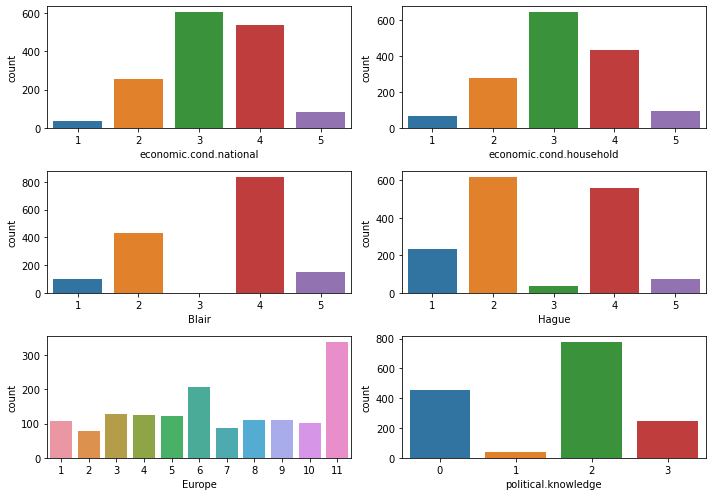

In [58]:
cat = X.drop('age', axis= 1)
cat_features = cat.columns
plt.figure(figsize= (10,7))
for i in range(len(cat_features)):
    plt.subplot(3, 2, i+1)
    sns.countplot(df[cat_features[i]])
    plt.tight_layout()

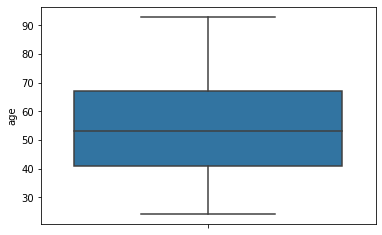

In [59]:
sns.boxplot(data= df, y = 'age');

## Logistic Regression

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [61]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [62]:
lr_predict = log_reg.predict(X_test)
lr_prob_predict = log_reg.predict_proba(X_test)
lr_prob_predict = lr_prob_predict[:,1]

### Model Evaluation

#### Confusion Matrix & Classification Report for Logistic Regression

In [63]:
lr_score = log_reg.score(X_test, y_test)
print('Logistic regression score: ', lr_score)
print('Confusion Matrix:\n', metrics.confusion_matrix(y_test, lr_predict), '\n')
print('Classification Report\n')
print(metrics.classification_report(y_test, lr_predict))

Logistic regression score:  0.8267543859649122
Confusion Matrix:
 [[110  43]
 [ 36 267]] 

Classification Report

              precision    recall  f1-score   support

           0       0.75      0.72      0.74       153
           1       0.86      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.80       456
weighted avg       0.83      0.83      0.83       456



#### ROC AUC score and ROC curve for Logistic Regression

AUC: 0.8776505101490542


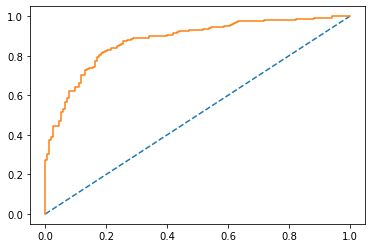

In [64]:
from sklearn.metrics import roc_auc_score, roc_curve
# caluclating roc_auc_score
lr_roc_auc_score = roc_auc_score(y_test, lr_prob_predict)
print('AUC: {0}'.format(lr_roc_auc_score))

# roc_curve calculation
lr_fpr, lr_tpr, lr_threshold = roc_curve(y_test, lr_prob_predict)
plt.plot([0, 1], [0, 1], linestyle='--')
# plotting roc_curve
plt.plot(lr_fpr, lr_tpr);

### Applying GridSearchCV for Logistic Regression

In [65]:
grid={'penalty':['l2','none'], #L1 regularization penalizes the sum of absolute values of the weights, whereas L2 regularization penalizes the sum of squares of the weights.
      'solver':['sag','lbfgs'], #For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones
      'tol':[0.0001,0.00001]} #Tolerance

In [66]:
lr_model = LogisticRegression(max_iter=10000,n_jobs=2)

In [67]:
grid_search = GridSearchCV(estimator = lr_model, param_grid = grid, cv = 3, n_jobs=-1, scoring='f1')

In [68]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=10000, n_jobs=2),
             n_jobs=-1,
             param_grid={'penalty': ['l2', 'none'], 'solver': ['sag', 'lbfgs'],
                         'tol': [0.0001, 1e-05]},
             scoring='f1')

In [69]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'l2', 'solver': 'sag', 'tol': 1e-05} 

LogisticRegression(max_iter=10000, n_jobs=2, solver='sag', tol=1e-05)


In [70]:
best_lr_model = grid_search.best_estimator_

In [71]:
# Predicting and calculating probabilities on test set 
lr_predict = best_lr_model.predict(X_test)
lr_prob = best_lr_model.predict_proba(X_test)
lr_prob = lr_prob[:, 1]

#### Model Evaluation after GridSearchCV

In [72]:
# Classification Report & Confusion Matrix
lr_gs_score = best_lr_model.score(X_test, y_test)
print('Logistic regression score after GridSearchCV: ', lr_gs_score)
print('Confusion Matrix:\n', metrics.confusion_matrix(y_test, lr_predict), '\n')
print('Classification Report\n')
print(metrics.classification_report(y_test, lr_predict))

Logistic regression score after GridSearchCV:  0.8267543859649122
Confusion Matrix:
 [[110  43]
 [ 36 267]] 

Classification Report

              precision    recall  f1-score   support

           0       0.75      0.72      0.74       153
           1       0.86      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.80       456
weighted avg       0.83      0.83      0.83       456



AUC: 0.8824823658836471


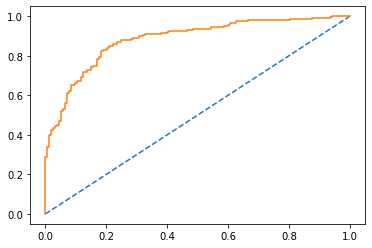

In [73]:
# ROC score and curve
# caluclating roc_auc_score
lr_roc_auc_score = roc_auc_score(y_test, lr_prob)
print('AUC: {0}'.format(lr_roc_auc_score))

# roc_curve calculation
lr_fpr, lr_tpr, lr_threshold = roc_curve(y_test, lr_prob)
plt.plot([0, 1], [0, 1], linestyle='--')
# plotting roc_curve
plt.plot(lr_fpr, lr_tpr);

Model has improved in performance after Grid Search Cross Validation.

## Linear Discriminant Analysis

In [74]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [75]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
lda_predict = lda.predict(X_test)

### Model Evaluation

In [76]:
lda_score = lda.score(X_test, y_test)
print('Score: ', lda_score)
print('Confusion Matrix:\n', metrics.confusion_matrix(y_test, lda_predict), '\n')
print('Classification Report\n')
print(metrics.classification_report(y_test, lda_predict))

Score:  0.8333333333333334
Confusion Matrix:
 [[111  42]
 [ 34 269]] 

Classification Report

              precision    recall  f1-score   support

           0       0.77      0.73      0.74       153
           1       0.86      0.89      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.83      0.83      0.83       456



#### GridSearchCV

In [77]:
grid={'solver':['svd', 'lsqr', 'eigen'], #Singular value decomposition (default). Does not compute the covariance matrix, therefore this solver is recommended for data with a large number of features.
      'tol':[0.0001,0.00001]} #Tolerance

In [78]:
lda_gs = LinearDiscriminantAnalysis()

In [79]:
grid_search = GridSearchCV(estimator = lda_gs, param_grid = grid, cv = 3)

In [80]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LinearDiscriminantAnalysis(),
             param_grid={'solver': ['svd', 'lsqr', 'eigen'],
                         'tol': [0.0001, 1e-05]})

In [81]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'solver': 'svd', 'tol': 0.0001} 

LinearDiscriminantAnalysis()


In [82]:
best_lda = grid_search.best_estimator_

In [83]:
# Predicting and calculating probabilities on test set 
lda_predict = best_lda.predict(X_test)
lda_prob = best_lda.predict_proba(X_test)
lda_prob = lda_prob[:, 1]

##### Evaluation after GridSearchCV

In [84]:
# Classification Report & Confusion Matrix
lda_gs_score = best_lda.score(X_test, y_test)
print('LDA score after GridSearchCV: ', lda_gs_score)
print('Confusion Matrix:\n', metrics.confusion_matrix(y_test, lda_predict), '\n')
print('Classification Report\n')
print(metrics.classification_report(y_test, lda_predict))

LDA score after GridSearchCV:  0.8333333333333334
Confusion Matrix:
 [[111  42]
 [ 34 269]] 

Classification Report

              precision    recall  f1-score   support

           0       0.77      0.73      0.74       153
           1       0.86      0.89      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.83      0.83      0.83       456



AUC: 0.8876377833861817


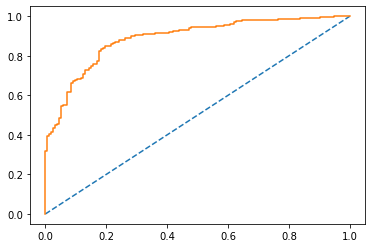

In [85]:
# ROC score and curve
# caluclating roc_auc_score
lda_roc_auc_score = roc_auc_score(y_test, lda_prob)
print('AUC: {0}'.format(lda_roc_auc_score))

# roc_curve calculation
lr_fpr, lr_tpr, lr_threshold = roc_curve(y_test, lda_prob)
plt.plot([0, 1], [0, 1], linestyle='--')
# plotting roc_curve
plt.plot(lr_fpr, lr_tpr);

Slight improvement in performance after GridSearchCV

In [86]:
lda_predict_final = best_lda.predict(X)
df['vote.predicted.lda'] = lda_predict_final

## Naive Bayes 

In [87]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [88]:
nb_predict = nb_model.predict(X_test)

In [89]:
nb_prob = nb_model.predict_proba(X_test)
nb_prob = nb_prob[:,1]

### Model Evaluation

In [90]:
nb_score = nb_model.score(X_test, y_test)
print('Score: ', nb_score)
print('Confusion Matrix:\n', metrics.confusion_matrix(y_test, nb_predict), '\n')
print('Classification Report\n')
print(metrics.classification_report(y_test, nb_predict))

Score:  0.8223684210526315
Confusion Matrix:
 [[112  41]
 [ 40 263]] 

Classification Report

              precision    recall  f1-score   support

           0       0.74      0.73      0.73       153
           1       0.87      0.87      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456



AUC: 0.8763562630772882


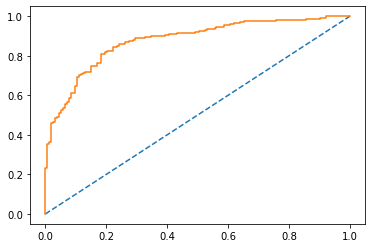

In [91]:
# ROC score and curve
# caluclating roc_auc_score
lr_roc_auc_score = roc_auc_score(y_test, nb_prob)
print('AUC: {0}'.format(lr_roc_auc_score))

# roc_curve calculation
lr_fpr, lr_tpr, lr_threshold = roc_curve(y_test, nb_prob)
plt.plot([0, 1], [0, 1], linestyle='--')
# plotting roc_curve
plt.plot(lr_fpr, lr_tpr);

## K-NN

In [92]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [93]:
knn_predict = knn_model.predict(X_test)

In [94]:
knn_prob = knn_model.predict_proba(X_test)
knn_prob = knn_prob[:, 1]

### Model Evaluation

In [95]:
knn_score = knn_model.score(X_test, y_test)
print('Score: ', knn_score)
print('Confusion Matrix:\n', metrics.confusion_matrix(y_test, knn_predict), '\n')
print('Classification Report\n')
print(metrics.classification_report(y_test, knn_predict))

Score:  0.8157894736842105
Confusion Matrix:
 [[ 99  54]
 [ 30 273]] 

Classification Report

              precision    recall  f1-score   support

           0       0.77      0.65      0.70       153
           1       0.83      0.90      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.77      0.78       456
weighted avg       0.81      0.82      0.81       456



AUC: 0.8516037878297633


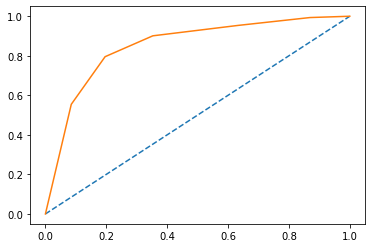

In [96]:
# ROC score and curve
# caluclating roc_auc_score
lr_roc_auc_score = roc_auc_score(y_test, knn_prob)
print('AUC: {0}'.format(lr_roc_auc_score))

# roc_curve calculation
lr_fpr, lr_tpr, lr_threshold = roc_curve(y_test, knn_prob)
plt.plot([0, 1], [0, 1], linestyle='--')
# plotting roc_curve
plt.plot(lr_fpr, lr_tpr);

#### Grid SearchCV

In [97]:
grid={'n_neighbors':[5,7],
      'weights':['uniform', 'distance'], # uniform : uniform weights. All points in each neighborhood are weighted equally.
                                        # distance : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.
      'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
      'leaf_size':[30],
      'p':[1,2]} # 1- manhattan distance, 2-euclidean distance

In [98]:
knn_gs = KNeighborsClassifier()
grid_search = GridSearchCV(estimator = knn_gs, param_grid = grid, cv = 3)

In [99]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [30], 'n_neighbors': [5, 7], 'p': [1, 2],
                         'weights': ['uniform', 'distance']})

In [100]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'algorithm': 'ball_tree', 'leaf_size': 30, 'n_neighbors': 7, 'p': 1, 'weights': 'uniform'} 

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=7, p=1)


In [101]:
best_knn = grid_search.best_estimator_
# Predicting and calculating probabilities on test set 
knn_predict = best_knn.predict(X_test)
knn_prob = best_knn.predict_proba(X_test)
knn_prob = knn_prob[:, 1]

#### Evaluation after GridSearchCV

K-NN score after GridSearchCV:  0.8048245614035088
Confusion Matrix:
 [[ 98  55]
 [ 34 269]] 

Classification Report

              precision    recall  f1-score   support

           0       0.74      0.64      0.69       153
           1       0.83      0.89      0.86       303

    accuracy                           0.80       456
   macro avg       0.79      0.76      0.77       456
weighted avg       0.80      0.80      0.80       456

AUC: 0.8876377833861817


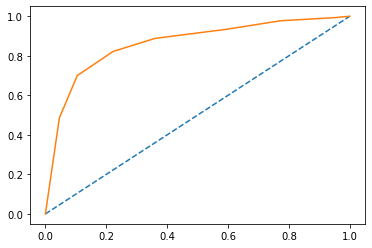

In [102]:
# Classification Report & Confusion Matrix
knn_gs_score = best_knn.score(X_test, y_test)
print('K-NN score after GridSearchCV: ', knn_gs_score)
print('Confusion Matrix:\n', metrics.confusion_matrix(y_test, knn_predict), '\n')
print('Classification Report\n')
print(metrics.classification_report(y_test, knn_predict))


# ROC score and curve
# caluclating roc_auc_score
knn_roc_auc_score = roc_auc_score(y_test, knn_prob)
print('AUC: {0}'.format(lda_roc_auc_score))

# roc_curve calculation
lr_fpr, lr_tpr, lr_threshold = roc_curve(y_test, knn_prob)
plt.plot([0, 1], [0, 1], linestyle='--')
# plotting roc_curve
plt.plot(lr_fpr, lr_tpr);

## Adaboost

In [103]:
from sklearn.ensemble import AdaBoostClassifier


adb_model = AdaBoostClassifier(n_estimators=100,random_state=1)
adb_model.fit(X_train,y_train)

adb_predict = adb_model.predict(X_test)
adb_prob = adb_model.predict_proba(X_test)
adb_prob = adb_prob[:, 1]

Score:  0.8135964912280702
Confusion Matrix:
 [[103  50]
 [ 35 268]] 

Classification Report

              precision    recall  f1-score   support

           0       0.75      0.67      0.71       153
           1       0.84      0.88      0.86       303

    accuracy                           0.81       456
   macro avg       0.79      0.78      0.79       456
weighted avg       0.81      0.81      0.81       456

AUC: 0.8876377833861817


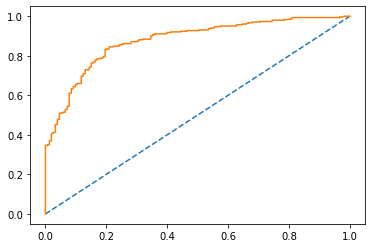

In [104]:
# Evaluation

# Classification Report & Confusion Matrix
adb_model_score = adb_model.score(X_test, y_test)
print('Score: ', adb_model_score)
print('Confusion Matrix:\n', metrics.confusion_matrix(y_test, adb_predict), '\n')
print('Classification Report\n')
print(metrics.classification_report(y_test, adb_predict))


# ROC score and curve
# caluclating roc_auc_score
adb_roc_auc_score = roc_auc_score(y_test, adb_prob)
print('AUC: {0}'.format(lda_roc_auc_score))

# roc_curve calculation
lr_fpr, lr_tpr, lr_threshold = roc_curve(y_test, adb_prob)
plt.plot([0, 1], [0, 1], linestyle='--')
# plotting roc_curve
plt.plot(lr_fpr, lr_tpr);

### Gradient Boosting

In [105]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(random_state=1)
gbcl = gbcl.fit(X_train, y_train)

bgcl_predict = gbcl.predict(X_test)
bgcl_prob = gbcl.predict_proba(X_test)
bgcl_prob = bgcl_prob[:, 1]

score:  0.8135964912280702
Confusion Matrix:
 [[105  48]
 [ 27 276]] 

Classification Report:

              precision    recall  f1-score   support

           0       0.80      0.69      0.74       153
           1       0.85      0.91      0.88       303

    accuracy                           0.84       456
   macro avg       0.82      0.80      0.81       456
weighted avg       0.83      0.84      0.83       456

AUC: 0.8876377833861817


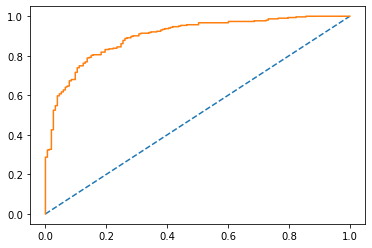

In [106]:
# Evaluation

# Classification Report & Confusion Matrix
adb_model_score = adb_model.score(X_test, y_test)
print('score: ', adb_model_score)
print('Confusion Matrix:\n', metrics.confusion_matrix(y_test, bgcl_predict), '\n')
print('Classification Report:\n')
print(metrics.classification_report(y_test, bgcl_predict))


# ROC score and curve
# caluclating roc_auc_score
adb_roc_auc_score = roc_auc_score(y_test, bgcl_prob)
print('AUC: {0}'.format(lda_roc_auc_score))

# roc_curve calculation
lr_fpr, lr_tpr, lr_threshold = roc_curve(y_test, bgcl_prob)
plt.plot([0, 1], [0, 1], linestyle='--')
# plotting roc_curve
plt.plot(lr_fpr, lr_tpr);

## Final Prediction

In [107]:
df['predicted.votes'] = gbcl.predict(X)

In [108]:
df.drop('vote.predicted.lda', axis= 1, inplace= True)

In [109]:
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender,predicted.votes
0,1,43,3,3,4,1,2,2,0,1
1,1,36,4,4,4,4,5,2,1,1
2,1,35,4,4,5,2,3,2,1,1
3,1,24,4,2,2,1,4,0,0,0
4,1,41,2,2,1,1,6,2,1,1


# Problem 2

In [110]:
import nltk
nltk.download('inaugural')
from nltk.corpus import inaugural, stopwords

from nltk import word_tokenize, sent_tokenize # This allows to create individual objects from a bog of words
from nltk.stem import WordNetLemmatizer # Lemmatizer helps to reduce words to the base form
from nltk import ngrams # Ngrams allows to group words in common pairs or trigrams..etc
from nltk.probability import FreqDist
import string
from wordcloud import WordCloud,STOPWORDS

inaugural.fileids()
roosevelt_1941 = inaugural.raw('1941-Roosevelt.txt')
kennedy_1961 = inaugural.raw('1961-Kennedy.txt')
nixon_1973 = inaugural.raw('1973-Nixon.txt')

stop = stopwords.words('english')

[nltk_data] Error loading inaugural: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


In [124]:
roosevelt_1941

'On each national day of inauguration since 1789, the people have renewed their sense of dedication to the United States.\n\nIn Washington\'s day the task of the people was to create and weld together a nation.\n\nIn Lincoln\'s day the task of the people was to preserve that Nation from disruption from within.\n\nIn this day the task of the people is to save that Nation and its institutions from disruption from without.\n\nTo us there has come a time, in the midst of swift happenings, to pause for a moment and take stock -- to recall what our place in history has been, and to rediscover what we are and what we may be. If we do not, we risk the real peril of inaction.\n\nLives of nations are determined not by the count of years, but by the lifetime of the human spirit. The life of a man is three-score years and ten: a little more, a little less. The life of a nation is the fullness of the measure of its will to live.\n\nThere are men who doubt this. There are men who believe that democr

## Text Analytics

In [111]:
# Tokenization of the text
def token(text):
    for w in text.split():
        w.lower()
    sent_token = sent_tokenize(text)
    word_token = word_tokenize(text)
    print('No of sentences are (before removing stop words & punctuations):', len(sent_token))
    print('No of words are (before removing stop words & punctuations):', len(word_token))
    return sent_token, word_token

In [112]:
print("For Roosevelt's speech")
roosevelt_sent, roosevelt_words = token(roosevelt_1941)
print("For Kennedy's speech")
kennedy_sent, kennedy_words = token(kennedy_1961)
print("For Nixon's speech")
nixon_sent, nixon_words = token(nixon_1973)

For Roosevelt's speech
No of sentences are (before removing stop words & punctuations): 68
No of words are (before removing stop words & punctuations): 1526
For Kennedy's speech
No of sentences are (before removing stop words & punctuations): 52
No of words are (before removing stop words & punctuations): 1543
For Nixon's speech
No of sentences are (before removing stop words & punctuations): 68
No of words are (before removing stop words & punctuations): 2006


In [122]:
# remove stopwords & punctuations
def remove_stopwords(tokenized_word):
    filtered_tokens = []
    punctuations=list(string.punctuation)
    punctuations.append(["'", "--"])
    filtered_tokens2=[]
    for w in tokenized_word:
        if w not in stop:
            filtered_tokens.append(w)
    for i in filtered_tokens:
        if i not in punctuations:
            filtered_tokens2.append(i)
    print("Filterd text:",filtered_tokens2)
    return filtered_tokens2

In [123]:
roosevelt_filtered_words = remove_stopwords(roosevelt_words)

Filterd text: ['On', 'national', 'day', 'inauguration', 'since', '1789', 'people', 'renewed', 'sense', 'dedication', 'United', 'States', 'In', 'Washington', "'s", 'day', 'task', 'people', 'create', 'weld', 'together', 'nation', 'In', 'Lincoln', "'s", 'day', 'task', 'people', 'preserve', 'Nation', 'disruption', 'within', 'In', 'day', 'task', 'people', 'save', 'Nation', 'institutions', 'disruption', 'without', 'To', 'us', 'come', 'time', 'midst', 'swift', 'happenings', 'pause', 'moment', 'take', 'stock', '--', 'recall', 'place', 'history', 'rediscover', 'may', 'If', 'risk', 'real', 'peril', 'inaction', 'Lives', 'nations', 'determined', 'count', 'years', 'lifetime', 'human', 'spirit', 'The', 'life', 'man', 'three-score', 'years', 'ten', 'little', 'little', 'less', 'The', 'life', 'nation', 'fullness', 'measure', 'live', 'There', 'men', 'doubt', 'There', 'men', 'believe', 'democracy', 'form', 'Government', 'frame', 'life', 'limited', 'measured', 'kind', 'mystical', 'artificial', 'fate', 'un

In [121]:
roosevelt_filtered_words

['On',
 'national',
 'day',
 'inauguration',
 'since',
 '1789',
 'people',
 'renewed',
 'sense',
 'dedication',
 'United',
 'States',
 'In',
 'Washington',
 "'s",
 'day',
 'task',
 'people',
 'create',
 'weld',
 'together',
 'nation',
 'In',
 'Lincoln',
 "'s",
 'day',
 'task',
 'people',
 'preserve',
 'Nation',
 'disruption',
 'within',
 'In',
 'day',
 'task',
 'people',
 'save',
 'Nation',
 'institutions',
 'disruption',
 'without',
 'To',
 'us',
 'come',
 'time',
 'midst',
 'swift',
 'happenings',
 'pause',
 'moment',
 'take',
 'stock',
 '--',
 'recall',
 'place',
 'history',
 'rediscover',
 'may',
 'If',
 'risk',
 'real',
 'peril',
 'inaction',
 'Lives',
 'nations',
 'determined',
 'count',
 'years',
 'lifetime',
 'human',
 'spirit',
 'The',
 'life',
 'man',
 'three-score',
 'years',
 'ten',
 'little',
 'little',
 'less',
 'The',
 'life',
 'nation',
 'fullness',
 'measure',
 'live',
 'There',
 'men',
 'doubt',
 'There',
 'men',
 'believe',
 'democracy',
 'form',
 'Government',
 'fra

In [119]:
kennedy_filtered_words = remove_stopwords(kennedy_words)

In [120]:
nixon_filtered_words = remove_stopwords(nixon_words)

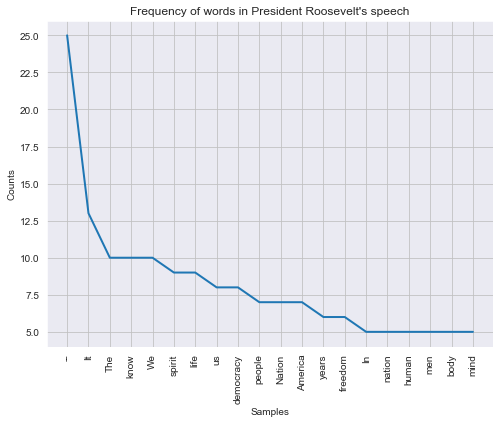

In [132]:
plt.figure(figsize= (8,6))
sns.set_style('darkgrid')
nlp_words=nltk.FreqDist(roosevelt_filtered_words)
plt.title("Frequency of words in President Roosevelt's speech")
nlp_words.plot(20);

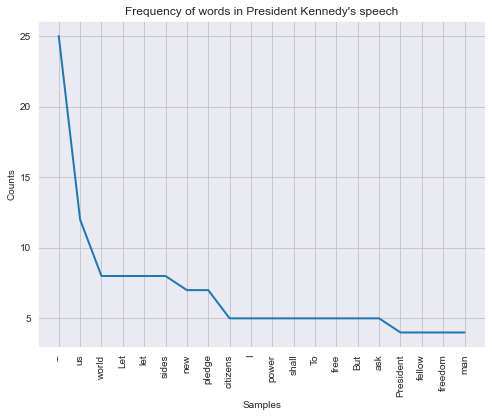

In [133]:
plt.figure(figsize= (8,6))
sns.set_style('darkgrid')
nlp_words=nltk.FreqDist(kennedy_filtered_words)
plt.title("Frequency of words in President Kennedy's speech")
nlp_words.plot(20);

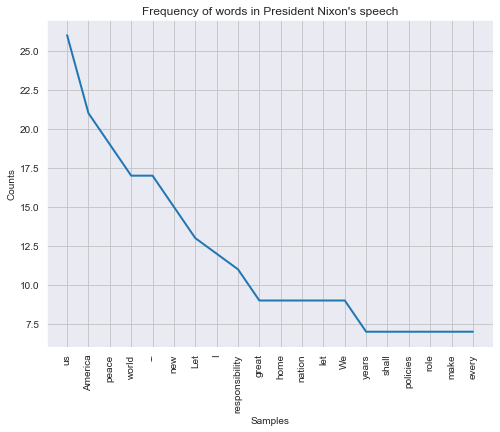

In [134]:
plt.figure(figsize= (8,6))
sns.set_style('darkgrid')
nlp_words=nltk.FreqDist(nixon_filtered_words)
plt.title("Frequency of words in President Nixon's speech")
nlp_words.plot(20);

In [122]:
def plot_word_cloud(word_token):
    text = ' '.join(word_token)
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=3000,
                      height=2500
                     ).generate(text)
    plt.figure(1,figsize=(12, 12))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

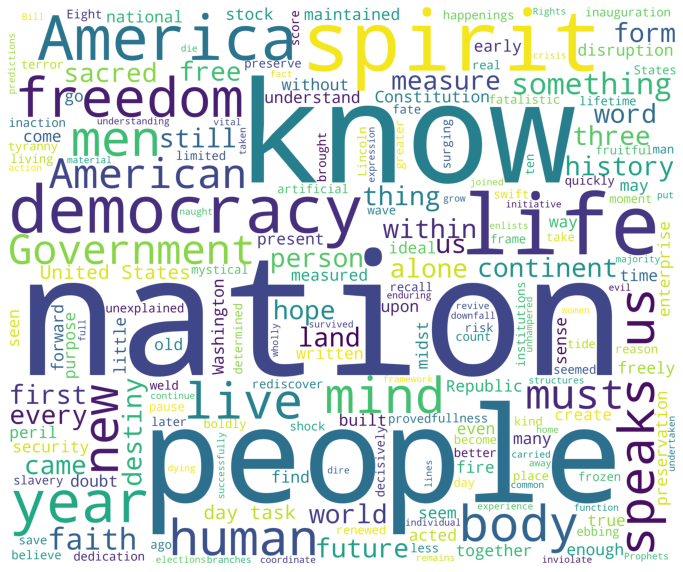

In [135]:
plot_word_cloud(roosevelt_filtered_words)

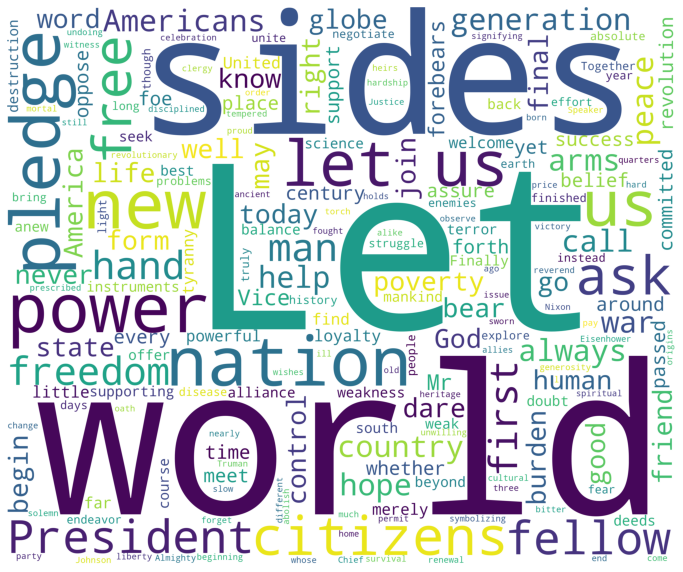

In [136]:
plot_word_cloud(kennedy_filtered_words)

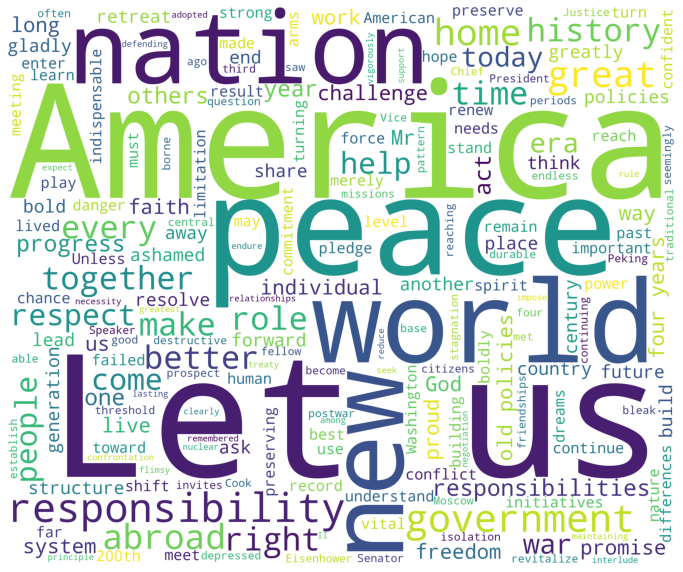

In [137]:
plot_word_cloud(nixon_filtered_words)